# Data Analysis of COVID-19 Cases (LIVE UPDATE) around the world

### Data Collection (website Source: Worldometer)

Importing BeautifulSoup for Data Scraping

In [7]:
import requests
from bs4 import BeautifulSoup
import re
import dateutil

In [8]:
result = requests.get("https://www.worldometers.info/coronavirus/#main_table")

In [9]:
assert result.status_code==200

In [10]:
src = result.content
document = BeautifulSoup(src, 'lxml')

Coverting Data in HTML form

In [11]:
table = document.find("table")
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">\n<thead>\n<tr>\n<th width="1%">#</th>\n<th width="100">Country,<br/>Other</th>\n<th width="20">Total<br/>Cases</th>\n<th width="30">New<br/>Cases</th>\n<th width="30">Total<br/>Deaths</th>\n<th width="30">New<br/>Deaths</th>\n<th width="30">Total<br/>Recovered</th>\n<th width="30">New<br/>Recovered</th>\n<th width="30">Active<br/>Cases</th>\n<th width="30">Serious,<br/>Critical</th>\n<th width="30">Tot\xa0Cases/<br/>1M pop</th>\n<th width="30">Deaths/<br/>1M pop</th>\n<th width="30">Total<br/>Tests</th>\n<th width="30">Tests/<br/>\n<nobr>1M pop</nobr>\n</th>\n<th width="30">Population</th>\n<th style="display:none" width="30">Continent</th>\n<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>\n<th width="30">New Cases/1M pop</th>\n<th width="30">New De

In [12]:
assert table.find("th").get_text() == '#'

In [13]:
rows = table.find_all("tr")
rows

[<tr>\n<th width="1%">#</th>\n<th width="100">Country,<br/>Other</th>\n<th width="20">Total<br/>Cases</th>\n<th width="30">New<br/>Cases</th>\n<th width="30">Total<br/>Deaths</th>\n<th width="30">New<br/>Deaths</th>\n<th width="30">Total<br/>Recovered</th>\n<th width="30">New<br/>Recovered</th>\n<th width="30">Active<br/>Cases</th>\n<th width="30">Serious,<br/>Critical</th>\n<th width="30">Tot\xa0Cases/<br/>1M pop</th>\n<th width="30">Deaths/<br/>1M pop</th>\n<th width="30">Total<br/>Tests</th>\n<th width="30">Tests/<br/>\n<nobr>1M pop</nobr>\n</th>\n<th width="30">Population</th>\n<th style="display:none" width="30">Continent</th>\n<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>\n<th width="30">New Cases/1M pop</th>\n<th width="30">New Deaths/1M pop</th>\n<th width="30">Active Cases/1M pop</th>\n</tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">\n<td></t

In [14]:
import requests
r = requests.get('https://www.worldometers.info/coronavirus/#main_table')
print(len(r.text))

1641116


In [15]:
soup = BeautifulSoup(r.text)
print(soup.title)
print(soup.title.string)

<title>COVID Live Update: 167,527,962 Cases and 3,478,355 Deaths from the Coronavirus - Worldometer</title>
COVID Live Update: 167,527,962 Cases and 3,478,355 Deaths from the Coronavirus - Worldometer


In [16]:
print(soup.p)
print(soup.p.text)
print(soup.a)
print(soup.a.title)
print()
print(soup.p.parent)

<p> </p>
 
<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>
None
()
<div style="margin-bottom:60px; clear:both; margin-top:60px ">
<p> </p>
</div>


In [17]:
rows = soup.find_all("tr")
print(len(rows))

717


Data Pre-proccessing (Data Frame)

In [18]:
table_data = []
for row in table.findAll('tr'):
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if (len(row_data) > 0):
        data_item = {"Country": row_data[1],
                     "Total Cases": row_data[2],
                     "New Cases": row_data[3],
                     "Total Deaths": row_data[4],
                     "New Deaths": row_data[5],
                     "Total Recovered": row_data[6],
                     "Active Cases": row_data[8],
                     "Critical Cases": row_data[9],
                     "Total case 1M": row_data[10],
                     "Total death 1M": row_data[11],
                     "Total Tests": row_data[12],
                     "Total test 1M": row_data[13],
        }
        table_data.append(data_item)

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(table_data)

In [21]:
df.head(15)

,Active Cases,Country,Critical Cases,New Cases,New Deaths,Total Cases,Total Deaths,Total Recovered,Total Tests,Total case 1M,Total death 1M,Total test 1M
0,"6,449,966",\nNorth America\n,"14,869","+1,805",+53,"39,485,097","885,048","32,150,083",,,,
1,"4,191,122",\nAsia\n,"31,707","+6,555",+9,"49,221,262","648,096","44,382,044",,,,
2,"2,012,950",\nSouth America\n,"28,996","+1,466",+55,"27,752,722","754,165","24,985,607",,,,
3,"2,447,112",\nEurope\n,"18,579","+1,753",+19,"46,200,885","1,061,047","42,692,726",,,,
4,"346,306",\nAfrica\n,"2,817",,,"4,800,002","128,741","4,324,955",,,,
5,"1,276",\nOceania\n,3,+8,,"67,273","1,243","64,754",,,,
6,0,\n\n,0,,,721,15,706,,,,
7,"15,448,732",World,"96,971","+11,587",+136,"167,527,962","3,478,355","148,600,875",,"21,492",446.2,
8,"5,790,318",USA,"6,980",,,"33,896,660","604,087","27,502,255","473,304,856","101,873","1,816","1,422,476"
9,"2,720,685",India,"8,944",+766,,"26,752,447","303,751","23,728,011","330,536,064","19,218",218,"237,439"


In [286]:
df.to_excel('Covid19_data.xlsx', index=True)
print("The excel file is Generated !!!")

The excel file is Generated !!!


In [22]:
df1=df.loc[8:219,['Country','New Cases','New Deaths','Total Cases','Total Deaths','Total Recovered','Active Cases','Critical Cases','Total Tests']]
df1.head(10)

,Country,New Cases,New Deaths,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests
8,USA,,,"33,896,660","604,087","27,502,255","5,790,318","6,980","473,304,856"
9,India,+766,,"26,752,447","303,751","23,728,011","2,720,685","8,944","330,536,064"
10,Brazil,,,"16,083,573","449,185","14,492,167","1,142,221","8,318","49,013,934"
11,France,,,"5,603,666","108,596","5,199,240","295,830","3,515","82,691,176"
12,Turkey,,,"5,186,487","46,268","5,024,313","115,906","1,843","52,377,678"
13,Russia,,,"5,001,505","118,482","4,617,762","265,261","2,300","135,700,000"
14,UK,,,"4,462,538","127,721","4,301,451","33,366",123,"174,655,862"
15,Italy,,,"4,192,183","125,225","3,785,866","281,092","1,410","64,558,486"
16,Germany,,,"3,654,201","87,973","3,397,100","169,128","3,477","59,197,639"
17,Spain,,,"3,636,453","79,620","3,356,272","200,561","1,655","48,928,535"


Removing the commas from the numbers

In [23]:
def removecomma(col_name):
    result = []
    for num in df1[col_name]:
        #print(num)
        result.append(num.replace(',', ''))
    df1[col_name]=result
    df1[col_name] = pd.to_numeric(df1[col_name], errors='coerce', downcast='integer')

In [24]:
colnames=df1.columns

In [25]:
for col in colnames[1:7]:
    removecomma(col)

In [26]:
df1.head()

,Country,New Cases,New Deaths,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests
8,USA,NaN,NaN,33896660,604087.0,27502255,5790318,"6,980","473,304,856"
9,India,766.0,NaN,26752447,303751.0,23728011,2720685,"8,944","330,536,064"
10,Brazil,NaN,NaN,16083573,449185.0,14492167,1142221,"8,318","49,013,934"
11,France,NaN,NaN,5603666,108596.0,5199240,295830,"3,515","82,691,176"
12,Turkey,NaN,NaN,5186487,46268.0,5024313,115906,"1,843","52,377,678"


### Percentage increase in New cases and New Deaths

In [27]:
df1.assign(perIncreaseNewCases =lambda x: ((df1['Active Cases'] - df1['New Cases'])/df1['Active Cases'])*100, perIncreaseNewDeaths = lambda x: ((df1['Total Deaths'] - df1['New Deaths'])/df1['Total Deaths'])*100)

,Country,New Cases,New Deaths,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,perIncreaseNewCases,perIncreaseNewDeaths
8,USA,NaN,NaN,33896660,604087.0,27502255,5790318,"6,980","473,304,856",NaN,NaN
9,India,766.0,NaN,26752447,303751.0,23728011,2720685,"8,944","330,536,064",99.971845,NaN
10,Brazil,NaN,NaN,16083573,449185.0,14492167,1142221,"8,318","49,013,934",NaN,NaN
11,France,NaN,NaN,5603666,108596.0,5199240,295830,"3,515","82,691,176",NaN,NaN
12,Turkey,NaN,NaN,5186487,46268.0,5024313,115906,"1,843","52,377,678",NaN,NaN
13,Russia,NaN,NaN,5001505,118482.0,4617762,265261,"2,300","135,700,000",NaN,NaN
14,UK,NaN,NaN,4462538,127721.0,4301451,33366,123,"174,655,862",NaN,NaN
15,Italy,NaN,NaN,4192183,125225.0,3785866,281092,"1,410","64,558,486",NaN,NaN
16,Germany,NaN,NaN,3654201,87973.0,3397100,169128,"3,477","59,197,639",NaN,NaN
17,Spain,NaN,NaN,3636453,79620.0,3356272,200561,"1,655","48,928,535",NaN,NaN


## Exploratory Data Analysis (EDA)

In [28]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
Active Cases       238 non-null object
Country            238 non-null object
Critical Cases     238 non-null object
New Cases          238 non-null object
New Deaths         238 non-null object
Total Cases        238 non-null object
Total Deaths       238 non-null object
Total Recovered    238 non-null object
Total Tests        238 non-null object
Total case 1M      238 non-null object
Total death 1M     238 non-null object
Total test 1M      238 non-null object
dtypes: object(12)
memory usage: 22.4+ KB


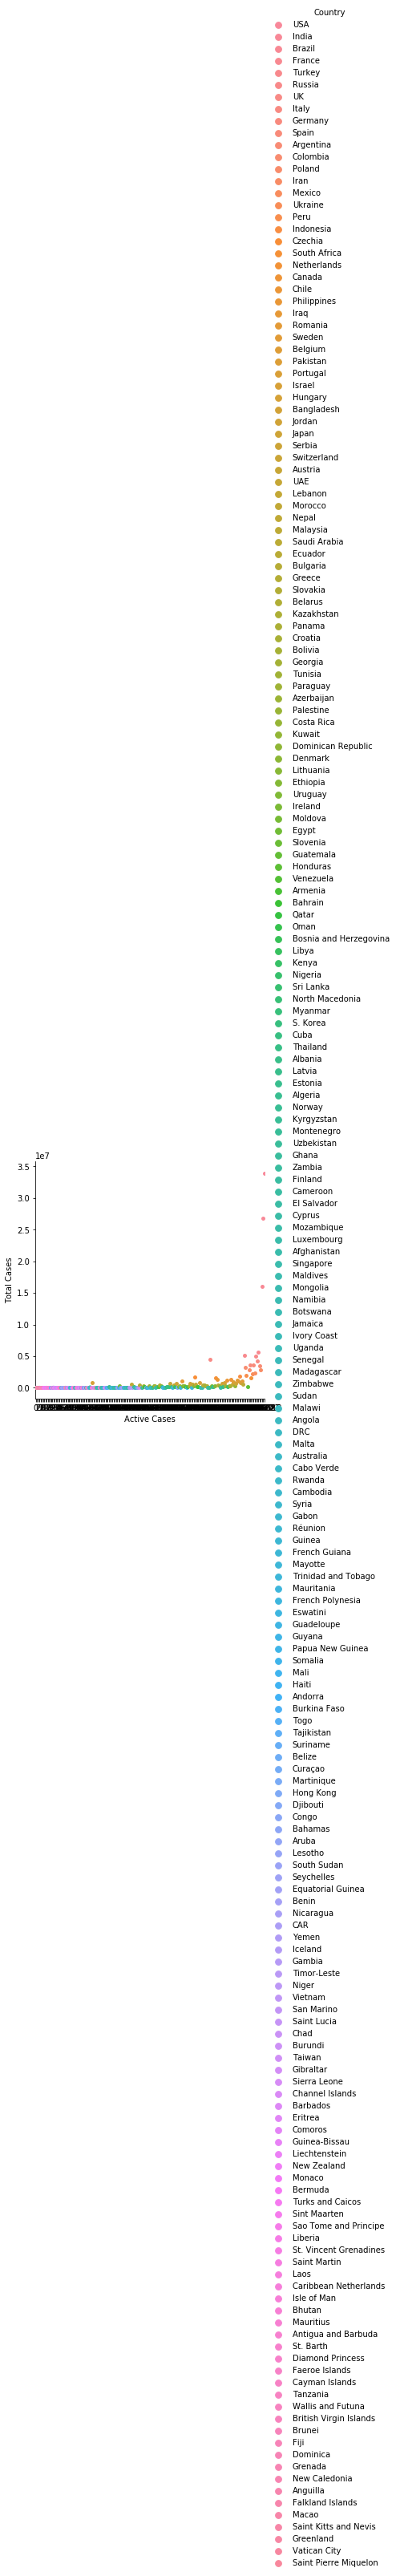

In [32]:
sns.catplot('Active Cases','Total Cases',hue='Country',data=df1)

We can see that the highest cases are some countries marked in red-orange color.
The top 10 worst hit hit countries are USA, India, Brazil, France, Turkey, Russia, UK, Italy, Spain, Germany.

So, let's analyze the top 10 worst hit contries.

In [33]:
df2 = df.loc[8:17,['Country','Active Cases','Total Cases','Total Deaths']]

In [34]:
df2.head(15)

,Country,Active Cases,Total Cases,Total Deaths
8,USA,"5,790,318","33,896,660","604,087"
9,India,"2,720,685","26,752,447","303,751"
10,Brazil,"1,142,221","16,083,573","449,185"
11,France,"295,830","5,603,666","108,596"
12,Turkey,"115,906","5,186,487","46,268"
13,Russia,"265,261","5,001,505","118,482"
14,UK,"33,366","4,462,538","127,721"
15,Italy,"281,092","4,192,183","125,225"
16,Germany,"169,128","3,654,201","87,973"
17,Spain,"200,561","3,636,453","79,620"


In [35]:
def removecomma(col_name):
    result = []
    for num in df2[col_name]:
        #print(num)
        result.append(num.replace(',', ''))
    df2[col_name]=result
    df2[col_name] = pd.to_numeric(df2[col_name], errors='coerce', downcast='integer')

In [36]:
colnames=df2.columns

In [37]:
for col in colnames[1:7]:
    removecomma(col)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 8 to 17
Data columns (total 4 columns):
Country         10 non-null object
Active Cases    10 non-null int32
Total Cases     10 non-null int32
Total Deaths    10 non-null int32
dtypes: int32(3), object(1)
memory usage: 272.0+ bytes


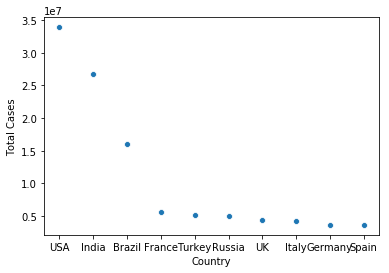

In [39]:
sns.scatterplot(x='Country',y='Total Cases',data = df2)

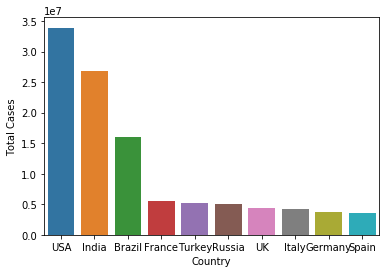

In [40]:
sns.barplot('Country','Total Cases', data=df2)

From the above graphs, we can conclude that, USA has the highest number of Total cases followed by India and then Brazil. 

Out of the worst 10 hit countries, UK, Italy, Spain, Germany are have the lowest total cases.

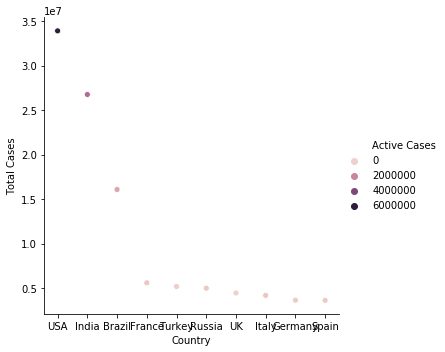

In [41]:
sns.relplot(x='Country', y='Total Cases', hue='Active Cases',data = df2)

USA has the highest number of active cases as well as the total cases, closely followed by India and then, Brazil.

From the gragh, we can see that, France, Turkey, Russia, UK,Italy, Spain, Germany have the active cases less 2500000.  

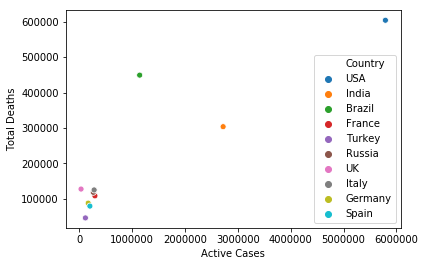

In [42]:
sns.scatterplot(x='Active Cases',y='Total Deaths',hue='Country',data = df2)

USA has the highest active cases and highest total deaths among all the 10 countries.

India, follows USA as the country with the second highest active cases but it's total deaths is lesser than that of Brazil which leads as the country with second highest number of deaths.

If we compare the number of active cases in France and Brazil, the difference of active cases in Brazil is 120K (12%) higher than in France, but the death rate of Brazil is much higher (74%) than France.

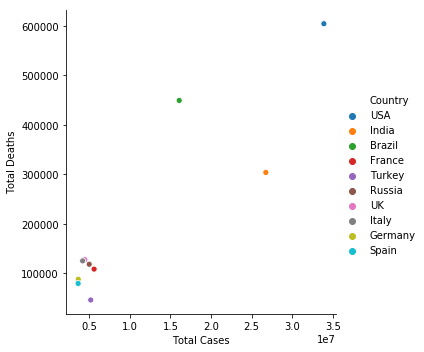

In [43]:
sns.relplot(x='Total Cases', y='Total Deaths', hue = 'Country',data = df2)

USA has the highest number of deaths and well as the highest number of total deaths. 

While comapring India and Brazil, we can see the same pattern we saw in the active cases repating itself. Even though, India has higher number of cases, the number of Total deaths is lesser in India.

Turkey has the lowest total deaths.

Spain ad Germany have higher deaths than Turkey but lesser Total cases.

In [44]:
data = df2.groupby("Country")["Active Cases"].sum()
data

Country
Brazil     1142221
France      295830
Germany     169128
India      2720685
Italy       281092
Russia      265261
Spain       200561
Turkey      115906
UK           33366
USA        5790318
Name: Active Cases, dtype: int32

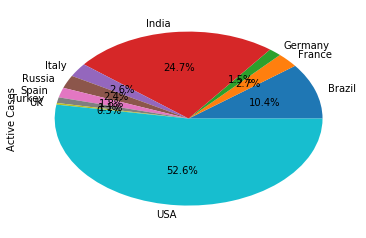

In [45]:
data.plot.pie(autopct="%.1f%%")

From the pie chart, we can conclude that from the top 10 worst hit countries, 48.8% actives cases are from USA which is nearly half of all the active cases.

From all the above graphs we can see that there is huge gap between all the other countries and the 3 worst hit countries that is USA, India and Brazil. 

Therefore,
Let's analyze the 3 highest COVID-19 hit countries - USA, India, Brazil

In [46]:
df_USA = df.loc[8:10,['Country','Active Cases','Total Cases','Total Deaths', 'Total Tests','Total Recovered','Critical Cases','Total case 1M','Total test 1M','Total death 1M']]

In [47]:
df_USA.head()

,Country,Active Cases,Total Cases,Total Deaths,Total Tests,Total Recovered,Critical Cases,Total case 1M,Total test 1M,Total death 1M
8,USA,"5,790,318","33,896,660","604,087","473,304,856","27,502,255","6,980","101,873","1,422,476","1,816"
9,India,"2,720,685","26,752,447","303,751","330,536,064","23,728,011","8,944","19,218","237,439",218
10,Brazil,"1,142,221","16,083,573","449,185","49,013,934","14,492,167","8,318","75,190","229,138","2,100"


In [48]:
def removecomma(col_name):
    result = []
    for num in df_USA[col_name]:
        #print(num)
        result.append(num.replace(',', ''))
    df_USA[col_name]=result
    df_USA[col_name] = pd.to_numeric(df_USA[col_name], errors='coerce', downcast='integer')

In [49]:
colnames=df_USA.columns

In [50]:
for col in colnames[1:7]:
    removecomma(col)

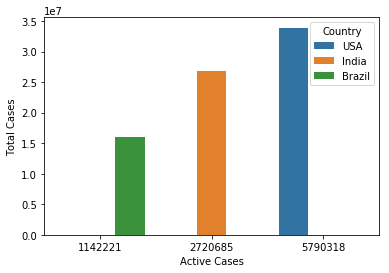

In [60]:
sns.barplot('Active Cases','Total Cases', hue='Country',data=df_USA)

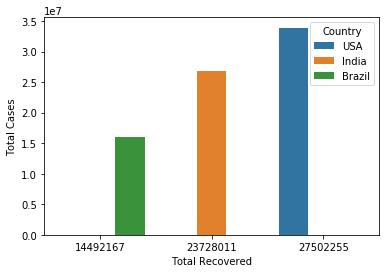

In [61]:
sns.barplot('Total Recovered','Total Cases', hue='Country',data=df_USA)

In [52]:
import matplotlib.pyplot as plt

In [53]:
w = 0.4

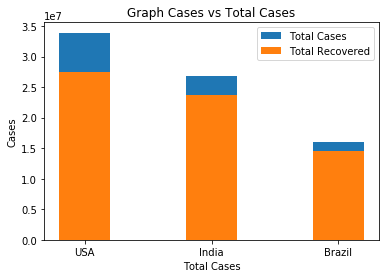

In [277]:
x = ["USA", "India", "Brazil"]
Total_active = ('Total Cases')
Total_recovered = ('Total Recovered')
plt.bar(x, 'Total Cases', w, data = df_USA, label= "Total Cases")
plt.bar(x, 'Total Recovered', w, data = df_USA, label= "Total Recovered")

plt.xlabel('Total Cases')
plt.ylabel('Cases')
plt.title('Graph Cases vs Total Cases')
plt.legend()

plt.show()

From the above graph, we can see that more the mumber of cases, higher is the number of recovered patients in every country.

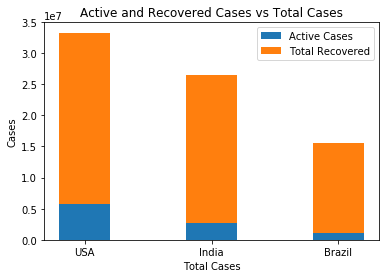

In [278]:
x = ["USA", "India", "Brazil"]
Total_active = ('Total Cases')
Total_recovered = ('Total Recovered')
plt.bar(x, 'Active Cases', w, data = df_USA, label= "Active Cases")
plt.bar(x, 'Total Recovered', w, bottom = 'Active Cases', data = df_USA, label= "Total Recovered")

plt.xlabel('Total Cases')
plt.ylabel('Cases')
plt.title('Active and Recovered Cases vs Total Cases')
plt.legend()

plt.show()

From the above graph, we can see that, USA has the highest number of active cases but also has the highest number of recovered cases and same pattern follows for India and Brazil.

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
w = 0.4

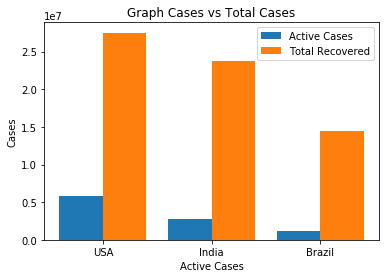

In [279]:
x = ["USA", "India", "Brazil"]
Total_cases = ('Active Cases')
Total_recovered = ('Total Recovered')

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 'Active Cases', w, data = df_USA, label= "Active Cases")
plt.bar(bar2, 'Total Recovered', w, data = df_USA, label= "Total Recovered")

plt.xlabel('Active Cases')
plt.ylabel('Cases')
plt.xticks(bar1+w/2, x)
plt.title('Graph Cases vs Total Cases')
plt.legend()

plt.show()

USA has the highest number active cases as well as the highest number of total cases.

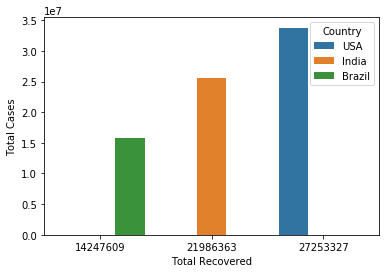

In [50]:
sns.barplot('Total Recovered','Total Cases', hue='Country',data=df_USA)

Since, USA has the highest number of total cases, the total recovered cases is also highest in USA.

We can see the same pattern in India and in Brazil. Higher the number of cases, the more people are getting recovered as well.

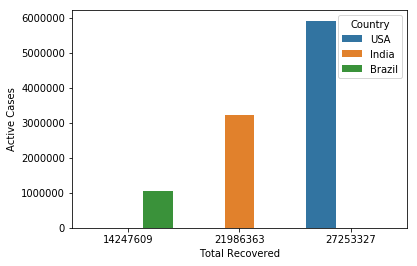

In [51]:
sns.barplot('Total Recovered','Active Cases', hue='Country',data=df_USA)

We can see from the above graph, that the active cases in USA is the highest, followed by India. We can also conclude that higher the number of the active cases, higher is the number of total recovered cases.  

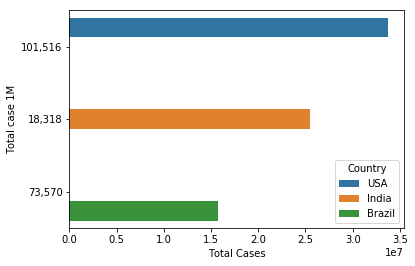

In [52]:
sns.barplot('Total Cases','Total case 1M', hue='Country',data=df_USA)

From the above graphs, we can conclude that even though, India has the second highest active cases, second highest Total total cases and highest daily new cases (as of 12th May, 2021), it has the lowest Cases per 1M population ratio. 

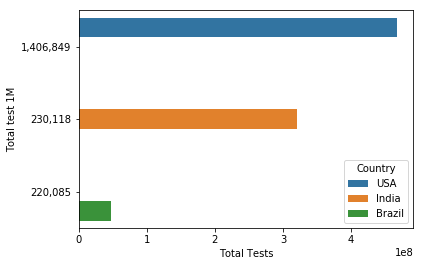

In [53]:
sns.barplot('Total Tests','Total test 1M', hue='Country',data=df_USA)

From the above graphs, we can conclude that even though, USA has the highest active cases, highest Total cases (as of 12th May, 2021), it also has the highest Tests per 1M population ratio. We can also conclude that more testing can mean more postive rate.

Even though, India's population is higher than that of USA, it's testing per 1M population ratio is almost 15% lesser than that of USA.

Brazil's Total cases may be lesser than that of India, but it's Total test per 1M is still 2% higher than India's Total test per 1M population.

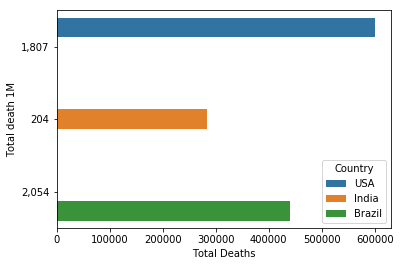

In [54]:
sns.barplot('Total Deaths','Total death 1M', hue='Country',data=df_USA)

Compared to the India and USA, with respect to Total deaths per 1M population, Brazil seems to be the worst hit country with 1,939 total deaths per 1M populationclosely followed by USA. 

## Analysis of Weekly Cases

Let's analyse the weekly COVID-19 cases of all the countries.

Data Collection (website Source: Worldometer)

Importing BeautifulSoup for Data Scraping

In [68]:
import requests
from bs4 import BeautifulSoup
import re
import dateutil

In [69]:
result = requests.get("https://www.worldometers.info/coronavirus/weekly-trends/#weekly_table")

In [70]:
assert result.status_code==200

In [71]:
src = result.content
document = BeautifulSoup(src, 'lxml')

Coverting Data in HTML form

In [72]:
tablee = document.find("table")
tablee

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">\n<thead>\n<tr>\n<th width="1%">#</th>\n<th width="100">Country,<br/>Other</th>\n<th width="30">Cases in the last 7 days</th><th width="30">Cases in the preceding 7 days</th><th width="30"><nobr>Weekly Case</nobr> <nobr>% Change</nobr></th><th width="30">Cases in the last <nobr>7 days</nobr>/1M pop</th><th width="30">Deaths in the last <nobr>7 days</nobr></th><th width="30">Deaths in the preceding <nobr>7 days</nobr></th><th width="30"><nobr>Weekly Death</nobr> <nobr>% Change</nobr></th><th width="30">Deaths in the last 7 days/1M pop</th><th width="30">Weekly Case Change</th><th width="30">Weekly Case Change/1M pop</th><th width="30">Weekly Deaths Change</th><th width="30">Weekly Deaths Change/1M pop</th><th width="30">Population</th>\n<th style="display:none" width="30">Continent</th>\n</tr>\n</thead>\n<tbody>\n<tr class="tota

In [73]:
assert tablee.find("th").get_text() == '#'

In [74]:
rows = tablee.find_all("tr")
rows

[<tr>\n<th width="1%">#</th>\n<th width="100">Country,<br/>Other</th>\n<th width="30">Cases in the last 7 days</th><th width="30">Cases in the preceding 7 days</th><th width="30"><nobr>Weekly Case</nobr> <nobr>% Change</nobr></th><th width="30">Cases in the last <nobr>7 days</nobr>/1M pop</th><th width="30">Deaths in the last <nobr>7 days</nobr></th><th width="30">Deaths in the preceding <nobr>7 days</nobr></th><th width="30"><nobr>Weekly Death</nobr> <nobr>% Change</nobr></th><th width="30">Deaths in the last 7 days/1M pop</th><th width="30">Weekly Case Change</th><th width="30">Weekly Case Change/1M pop</th><th width="30">Weekly Deaths Change</th><th width="30">Weekly Deaths Change/1M pop</th><th width="30">Population</th>\n<th style="display:none" width="30">Continent</th>\n</tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">\n<td></td>\n<td style="text-align:left;">\n<nobr>Asia</nobr>\n</td>\n<td>2,378,496</td>\n<td>2,884,852</td>\n<td>-18%

In [75]:
import requests
r = requests.get("https://www.worldometers.info/coronavirus/weekly-trends/#weekly_table")
print(len(r.text))

258791


Data Pre-proccessing (Data Frame)

In [76]:
tablee_data = []
for row in tablee.findAll('tr'):
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if (len(row_data) > 0):
        data_item = {"Country": row_data[1],
                     "Cases in the last 7 days": row_data[2],
                     "Cases in the preceding 7 days": row_data[3],
                     "Weekly case % Change": row_data[4],
                     "Cases in the last 7 days/1M pop": row_data[5],
                     "Deaths in the last 7 days": row_data[6],
                     "Deaths in the last 7 days": row_data[7],
                     "Weekly Death % Change": row_data[8],
                     "Deaths in the last 7 days/1M pop": row_data[9],
                     "Weekly Case Change": row_data[10],
                     "Weekly Case Change/1M pop": row_data[11],
                     "Weekly Death Changes": row_data[12],
                     "Weekly Death Changes/1M pop": row_data[13]
        }
        tablee_data.append(data_item)

In [77]:
import pandas as pd

In [78]:
df_weekly = pd.DataFrame(tablee_data)

In [79]:
df_weekly.head(15)

,Cases in the last 7 days,Cases in the last 7 days/1M pop,Cases in the preceding 7 days,Country,Deaths in the last 7 days,Deaths in the last 7 days/1M pop,Weekly Case Change,Weekly Case Change/1M pop,Weekly Death % Change,Weekly Death Changes,Weekly Death Changes/1M pop,Weekly case % Change
0,"2,378,496",,"2,884,852",\nAsia\n,"38,809",,"-506,356",,\n+3%,"+1,044",,-18%
1,"1,626",,"1,742",\nOceania\n,16,,-116,,\n+25%,+4,,-7%
2,"270,851",,"341,674",\nNorth America\n,"7,165",,"-70,823",,\n-13%,-967,,-21%
3,"465,093",,"578,621",\nEurope\n,"14,206",,"-113,528",,\n-20%,"-2,823",,-20%
4,"69,683",,"54,861",\nAfrica\n,"1,857",,"+14,822",,\n+13%,+235,,+27%
5,"962,736",,"865,385",\nSouth America\n,"24,485",,"+97,351",,\n+2%,+608,,+11%
6,"4,148,485",,"4,727,135",World,"86,538",,"-578,650",,-2%,"-1,899",,-12%
7,126,0.1,89,China,0,0,+37,0.0,0%,0,0,+42%
8,"28,053",401,"18,072",Thailand,190,3,"+9,981",+143,-2%,-3,0.0,+55%
9,"36,907",293,"44,115",Japan,640,6,"-7,208",-57,+23%,+147,+1,-16%


The above data needs to be cleaned before we could analyse it any further.

In [80]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
Cases in the last 7 days            220 non-null object
Cases in the last 7 days/1M pop     220 non-null object
Cases in the preceding 7 days       220 non-null object
Country                             220 non-null object
Deaths in the last 7 days           220 non-null object
Deaths in the last 7 days/1M pop    220 non-null object
Weekly Case Change                  220 non-null object
Weekly Case Change/1M pop           220 non-null object
Weekly Death % Change               220 non-null object
Weekly Death Changes                220 non-null object
Weekly Death Changes/1M pop         220 non-null object
Weekly case % Change                220 non-null object
dtypes: object(12)
memory usage: 20.7+ KB


Data Cleaning

In [221]:
df1_weekly = df_weekly.loc[7:209,['Country','Cases in the last 7 days','Cases in the preceding 7 days','Deaths in the last 7 days','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]
df1_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
7,China,126,89,0,0.1,0
8,Thailand,"28,053","18,072",190,401,3
9,Japan,"36,907","44,115",640,293,6
10,Singapore,239,226,0,41,0.2
11,Hong Kong,8,17,0,1,0
12,S. Korea,"4,258","4,362",26,83,0.6
13,Taiwan,"2,841",553,0,119,0.5
14,Australia,36,59,0,1,0
15,Malaysia,"41,981","29,433",219,"1,282",11
16,Macao,1,0,0,2,0


In [222]:
def removecomma(col_name):
    result = []
    for num in df1_weekly[col_name]:
        #print(num)
        result.append(num.replace(',', ''))
    df1_weekly[col_name]=result
    df1_weekly[col_name] = pd.to_numeric(df1_weekly[col_name], errors='coerce', downcast='integer')

In [223]:
colnames=df1_weekly.columns

In [224]:
for col in colnames[1:7]:
    removecomma(col)

In [225]:
df1_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
7,China,126,89,0,0.1,0.0
8,Thailand,28053,18072,190,401.0,3.0
9,Japan,36907,44115,640,293.0,6.0
10,Singapore,239,226,0,41.0,0.2
11,Hong Kong,8,17,0,1.0,0.0
12,S. Korea,4258,4362,26,83.0,0.6
13,Taiwan,2841,553,0,119.0,0.5
14,Australia,36,59,0,1.0,0.0
15,Malaysia,41981,29433,219,1282.0,11.0
16,Macao,1,0,0,2.0,0.0


In [215]:
df1_weekly.loc[df1_weekly['Country'] == 'India']

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop,Weekly case % Change,Weekly Death % Change
28,India,"1,786,756","2,302,515","28,265","1,284",21,-22%,+4%


The above data needs to sorted in ascending order of the cases in last 7 days for better results in analysis.

In [89]:
df1_weekly.sort_values("Cases in the last 7 days", axis = 0, ascending = True,
                 inplace = True, na_position ='first')

In [90]:
df1_weekly.sort_values("Cases in the last 7 days", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
106,Grenada,0,1,0,0.0,0.0
39,Anguilla,0,10,0,0.0,0.0
146,Mayotte,0,42,1,0.0,0.0
192,South Sudan,0,14,0,0.0,0.0
60,British Virgin Islands,0,29,0,0.0,0.0
103,Gibraltar,1,0,0,30.0,0.0
16,Macao,1,0,0,2.0,0.0
157,New Caledonia,1,0,0,3.0,0.0
120,Isle of Man,1,0,0,12.0,0.0
71,Channel Islands,2,1,0,11.0,0.0


In [91]:
df1_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
106,Grenada,0,1,0,0.0,0.0
39,Anguilla,0,10,0,0.0,0.0
146,Mayotte,0,42,1,0.0,0.0
192,South Sudan,0,14,0,0.0,0.0
60,British Virgin Islands,0,29,0,0.0,0.0
103,Gibraltar,1,0,0,30.0,0.0
16,Macao,1,0,0,2.0,0.0
157,New Caledonia,1,0,0,3.0,0.0
120,Isle of Man,1,0,0,12.0,0.0
71,Channel Islands,2,1,0,11.0,0.0


In [92]:
df1_weekly.tail(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
29,Nepal,58221,60353,1281,1967.0,45.0
25,Russia,61260,59983,2545,420.0,18.0
203,Turkey,69113,86042,1731,812.0,18.0
117,Iran,81352,96355,2026,958.0,20.0
19,France,87702,94501,1237,1341.0,15.0
73,Colombia,114030,115668,3446,2220.0,67.0
17,USA,175581,229830,4365,528.0,12.0
41,Argentina,232199,159545,3197,5096.0,78.0
59,Brazil,456098,442685,13405,2132.0,62.0
28,India,1786756,2302515,28265,1284.0,21.0


In [93]:
df1_weekly.sort_values("Cases in the last 7 days", axis = 0, ascending = False,
                 inplace = True, na_position ='first')

In [94]:
df1_weekly.sort_values("Cases in the last 7 days", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
28,India,1786756,2302515,28265,1284.0,21.0
59,Brazil,456098,442685,13405,2132.0,62.0
41,Argentina,232199,159545,3197,5096.0,78.0
17,USA,175581,229830,4365,528.0,12.0
73,Colombia,114030,115668,3446,2220.0,67.0
19,France,87702,94501,1237,1341.0,15.0
117,Iran,81352,96355,2026,958.0,20.0
203,Turkey,69113,86042,1731,812.0,18.0
25,Russia,61260,59983,2545,420.0,18.0
29,Nepal,58221,60353,1281,1967.0,45.0


In [95]:
df1_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
28,India,1786756,2302515,28265,1284.0,21.0
59,Brazil,456098,442685,13405,2132.0,62.0
41,Argentina,232199,159545,3197,5096.0,78.0
17,USA,175581,229830,4365,528.0,12.0
73,Colombia,114030,115668,3446,2220.0,67.0
19,France,87702,94501,1237,1341.0,15.0
117,Iran,81352,96355,2026,958.0,20.0
203,Turkey,69113,86042,1731,812.0,18.0
25,Russia,61260,59983,2545,420.0,18.0
29,Nepal,58221,60353,1281,1967.0,45.0


In [244]:
df3_weekly = df1_weekly.loc[(59,41,17,73,19,117,203,25,29),['Country','Cases in the last 7 days','Cases in the preceding 7 days','Deaths in the last 7 days','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]

In [268]:
df4_weekly = df_weekly.loc[(28,59,41,17,73,19,117,203,25,29),['Country','Cases in the last 7 days','Cases in the preceding 7 days','Deaths in the last 7 days','Weekly case % Change','Weekly Death % Change']]

In [269]:
df4_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Weekly case % Change,Weekly Death % Change
28,India,"1,786,756","2,302,515","28,265",-22%,+4%
59,Brazil,"456,098","442,685","13,405",+3%,0%
41,Argentina,"232,199","159,545","3,197",+46%,+11%
17,USA,"175,581","229,830","4,365",-24%,-11%
73,Colombia,"114,030","115,668","3,446",-1%,-1%
19,France,"87,702","94,501","1,237",-7%,-22%
117,Iran,"81,352","96,355","2,026",-16%,-18%
203,Turkey,"69,113","86,042","1,731",-20%,-13%
25,Russia,"61,260","59,983","2,545",+2%,+3%
29,Nepal,"58,221","60,353","1,281",-4%,+5%


## Exploratory Data Analysis (EDA)

We first begin to analyis the weekly cases of all the countries affected by COVID-19.

In [96]:
import pandas as pd

In [97]:
import matplotlib.pyplot as plt

In [148]:
data = df1_weekly.groupby("Country")["Cases in the last 7 days"].sum()
data

Country
Afghanistan                 2677
Albania                      194
Algeria                     1549
Andorra                       59
Angola                      1804
Anguilla                       0
Antigua and Barbuda           16
Argentina                 232199
Armenia                     1088
Aruba                         63
Australia                     36
Austria                     4283
Azerbaijan                  2611
Bahamas                      372
Bahrain                    17070
Bangladesh                  8921
Barbados                      28
Belarus                     9684
Belgium                    17057
Belize                        50
Benin                         30
Bermuda                       22
Bhutan                       108
Bolivia                    16671
Bosnia and Herzegovina       917
Botswana                    1964
Brazil                    456098
British Virgin Islands         0
Brunei                         3
Bulgaria                    2454
  

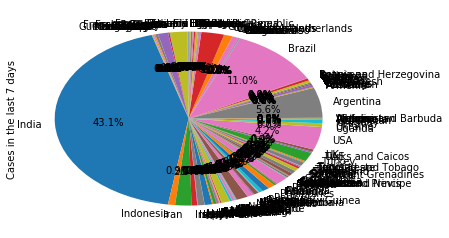

In [151]:
data.plot.pie(autopct="%.1f%%")

From the above pie plot, we can see that from total cases in the world in the last 7 days, 43.1% were from India, 11% were from Brazil and 4.2% were from USA. 

Since all the countries in the world, affected by COVID-19 are are considered for the analysis, the graph is not very clear.

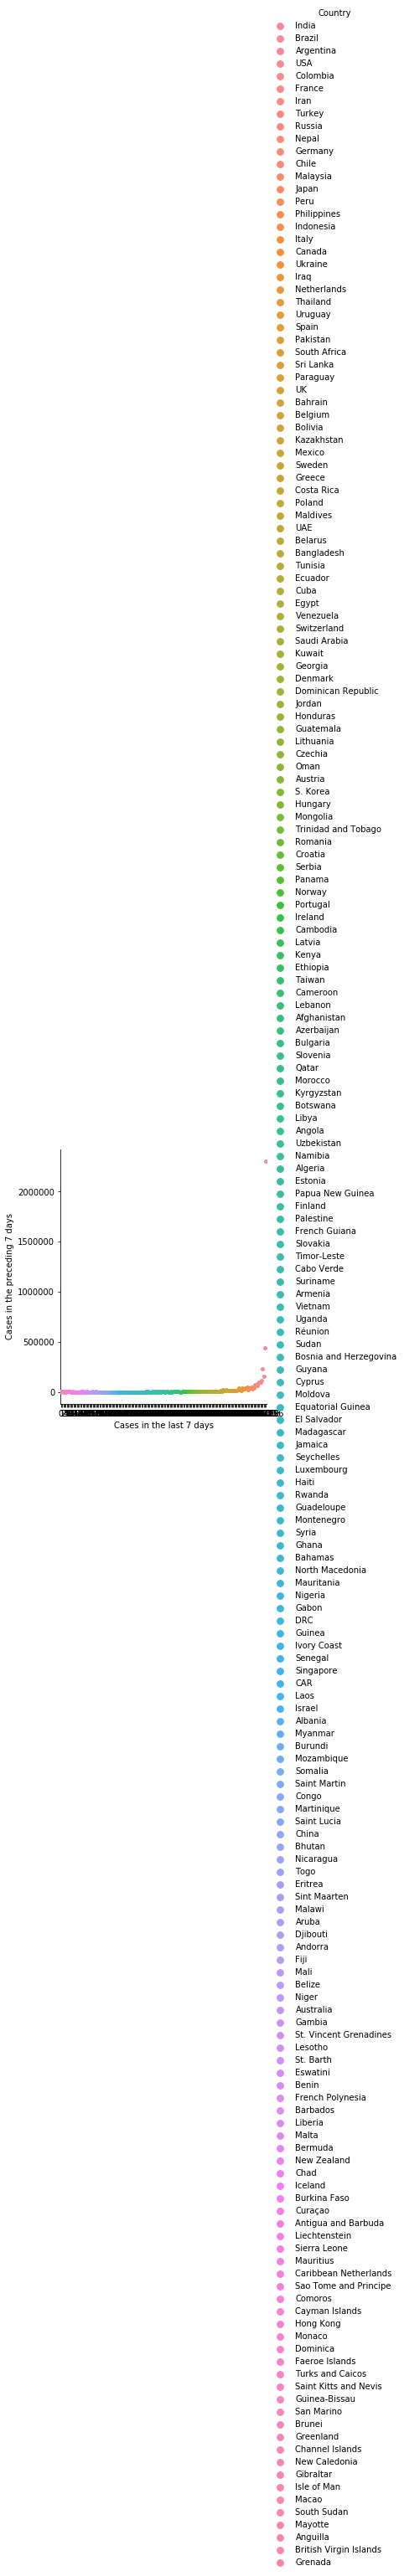

In [99]:
sns.catplot('Cases in the last 7 days','Cases in the preceding 7 days',hue='Country',data=df1_weekly)

India, Brazil, Argentina, USA, Columbia, France, Iran, Turkey, Russia, Nepal are top 10 countries which have the most cases in the last 7 days (as of 24th May, 2021)

Hence, let's analyse the top 10 countries which have most cases in the recent days.

In [124]:
df2_weekly = df1_weekly.loc[(28,59,41,17,73,19,117,203,25,29),['Country','Cases in the last 7 days','Cases in the preceding 7 days','Deaths in the last 7 days','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]

In [128]:
df2_weekly.head(10)

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Deaths in the last 7 days,Cases in the last 7 days/1M pop,Deaths in the last 7 days/1M pop
28,India,1786756,2302515,28265,1284.0,21.0
59,Brazil,456098,442685,13405,2132.0,62.0
41,Argentina,232199,159545,3197,5096.0,78.0
17,USA,175581,229830,4365,528.0,12.0
73,Colombia,114030,115668,3446,2220.0,67.0
19,France,87702,94501,1237,1341.0,15.0
117,Iran,81352,96355,2026,958.0,20.0
203,Turkey,69113,86042,1731,812.0,18.0
25,Russia,61260,59983,2545,420.0,18.0
29,Nepal,58221,60353,1281,1967.0,45.0


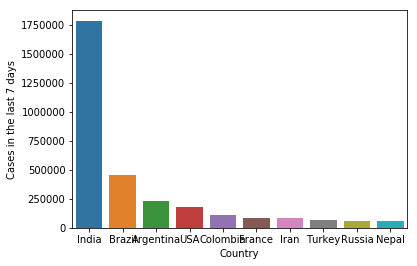

In [130]:
sns.barplot('Country','Cases in the last 7 days', data=df2_weekly)

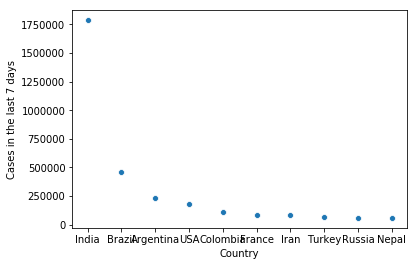

In [131]:
sns.scatterplot(x='Country',y='Cases in the last 7 days', data=df2_weekly)

India has the highest number of cases in last 7 days with more than 17,50,000 cases.
It is followed by Brazil which has close to 5,00,000 cases in the last 7 days. Argentina has close to 23,00,000 cases closely followed by USA, Columbia, Francea and Iran. 

It can be observed that there is a huge difference between cases in India and cases in the other countries which is a result of the second wave of COVID-19 which has hit India. (as of 25th May, 2021) 
India has almost a 74% of more cases than Brazil in the 7 days itself.

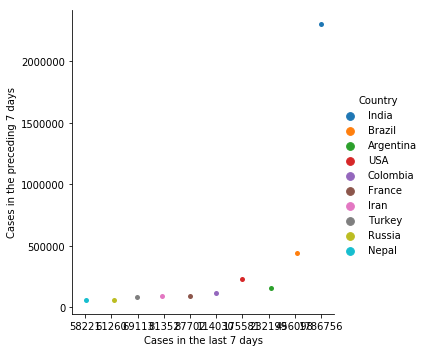

In [129]:
sns.catplot('Cases in the last 7 days','Cases in the preceding 7 days',hue='Country',data=df2_weekly)

In [139]:
w=0.4

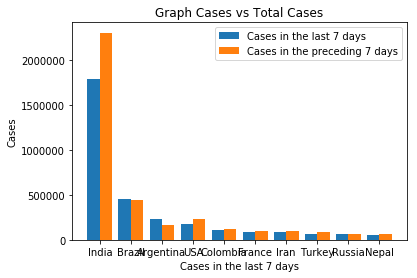

In [141]:
x = ["India", "Brazil", "Argentina","USA","Colombia","France","Iran","Turkey","Russia","Nepal"]
Last7_cases = ('Cases in the last 7 days')
Preceding7_recovered = ('Cases in the preceding 7 days')

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 'Cases in the last 7 days', w, data = df2_weekly, label= "Cases in the last 7 days")
plt.bar(bar2, 'Cases in the preceding 7 days', w, data = df2_weekly, label= "Cases in the preceding 7 days")

plt.xlabel('Cases in the last 7 days')
plt.ylabel('Cases')
plt.xticks(bar1+w/2, x)
plt.title('Graph Cases vs Total Cases')
plt.legend()

plt.show()

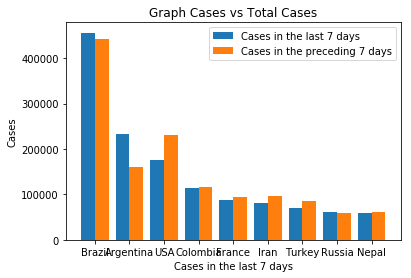

In [144]:
x = ["Brazil", "Argentina","USA","Colombia","France","Iran","Turkey","Russia","Nepal"]
Last7_cases = ('Cases in the last 7 days')
Preceding7_recovered = ('Cases in the preceding 7 days')

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, 'Cases in the last 7 days', w, data = df3_weekly, label= "Cases in the last 7 days")
plt.bar(bar2, 'Cases in the preceding 7 days', w, data = df3_weekly, label= "Cases in the preceding 7 days")

plt.xlabel('Cases in the last 7 days')
plt.ylabel('Cases')
plt.xticks(bar1+w/2, x)
plt.title('Graph Cases vs Total Cases')
plt.legend()

plt.show()

From the above graphs, we can interpret that cases in India, USA, Colombia, France, Iran, Turkey, Nepal were more in the preceding 7 days than in the last 7 days. 
Whereas cases in Brazil, Argentina and Russia the cases in the last 7 days are more than the preceding 7 days.

In [146]:
data = df2_weekly.groupby("Country")["Cases in the last 7 days"].sum()
data

Country
Argentina     232199
Brazil        456098
Colombia      114030
France         87702
India        1786756
Iran           81352
Nepal          58221
Russia         61260
Turkey         69113
USA           175581
Name: Cases in the last 7 days, dtype: int32

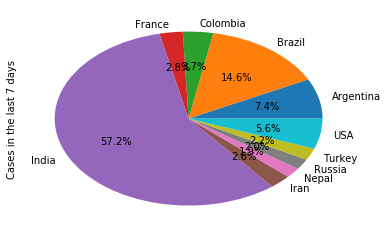

In [147]:
data.plot.pie(autopct="%.1f%%")

From the above pie plot, we can see that in the last 7 days, the most cases in the last 7 days in the world in Top 10 countries which have had the most cases in recent days, India contributes to more than half the cases which is 57.2% cases. 

Brazil has almost 15% cases in the last 7 days, with Argentina having 7.4% cases followed by Colombia at 7% and USA at 5.6%.

Other Countries have less than 3% cases in the last 7 days. 

In [152]:
data = df2_weekly.groupby("Country")["Cases in the preceding 7 days"].sum()
data

Country
Argentina     159545
Brazil        442685
Colombia      115668
France         94501
India        2302515
Iran           96355
Nepal          60353
Russia         59983
Turkey         86042
USA           229830
Name: Cases in the preceding 7 days, dtype: int32

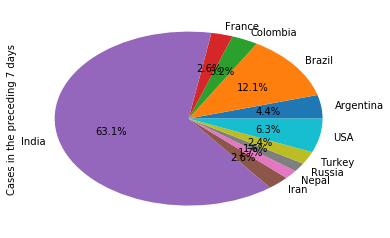

In [153]:
data.plot.pie(autopct="%.1f%%")

If we look at the number of cases in preceding 7 days, we can that India had 63% cases in those 7 days. But after comparing those preceding 7 days to the last 7 days, we can say that the number of cases as decreasing in India.

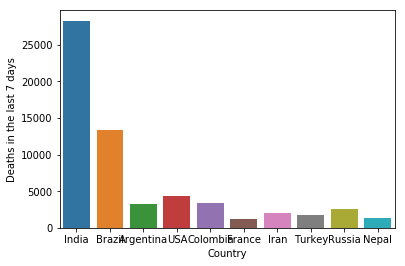

In [154]:
sns.barplot('Country','Deaths in the last 7 days', data=df2_weekly)

From the above graph, we can see the maximun number of deaths in the last 7 days were in India followed by Brazil, USA and Colombia. India has almost 52% more deaths than the second highest deaths i.e in Brazil in the last 7 days.  

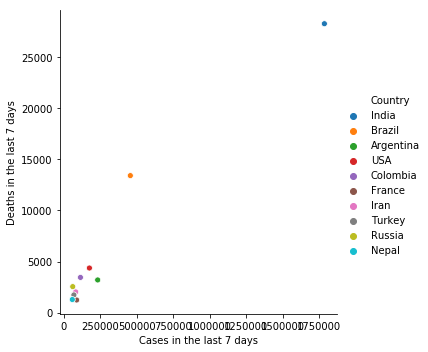

In [155]:
sns.relplot(x='Cases in the last 7 days', y='Deaths in the last 7 days', hue = 'Country',data = df2_weekly)

From the above graph, we can conclude that in the last 7 days, India has the most number of cases and well as the most number of deaths.

There is a very huge difference between the worst hit country currently, which is India. It has almost around 74% more cases in the last 7 days than the rest of the countries.

This is why, let's plot another graph with include others country excluding India.

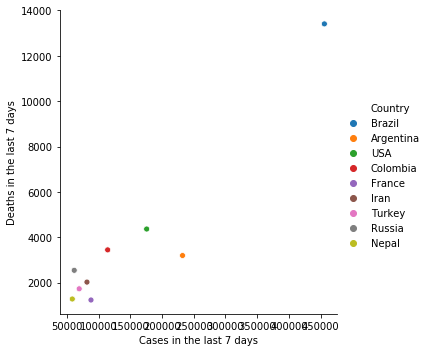

In [157]:
sns.relplot(x='Cases in the last 7 days', y='Deaths in the last 7 days', hue = 'Country',data = df3_weekly)

In the above graph, we observe that Brazil leads in the number of cases and number of deaths in the last 7 days.

If we observe the graph carefully, we can see that Argentina has the third highest number of cases but the number of deaths in less as compared to USA which has number of cases but more of deaths in the last 7 days.
In fact, Colombia, has way more less cases than Argentina but more deaths than it.

France has more cases than Iran, turkey, Russia and Nepal in the last 7 days but lowest number of deaths of the mentioned countries in the last 7 days.

Russia has less cases than all the countries except Nepal but has deaths more France, Turkey, Iran and Nepal in the 7 days.

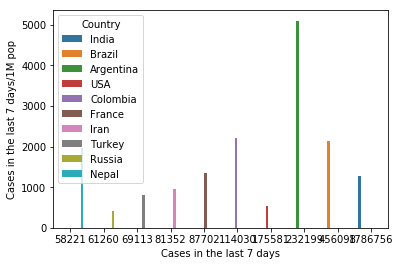

In [161]:
sns.barplot('Cases in the last 7 days','Cases in the last 7 days/1M pop', hue='Country',data=df2_weekly)

If we consider cases in the last 7 days per 1M population, we can see that Argentina has highest cases with per 1M population in the last 7 days. Even though India has the highest cases in the last 7 days, Argentina, Colombia, and Brazil has higher number of cases per 1M population.

Brazil has higher number of cases in the last 7 days but per 1M cases is more than India.

USA has more cases than Colombia, France, Iran, Tyrkey, Russia and Nepal but the cases per 1M population less than these countries. 

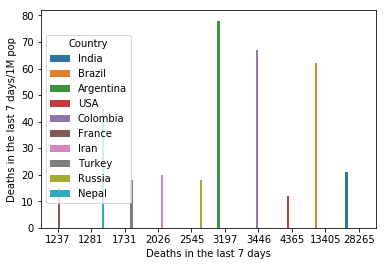

In [171]:
sns.barplot('Deaths in the last 7 days','Deaths in the last 7 days/1M pop',data=df2_weekly, hue='Country')
plt.legend(loc='center left', title='Country')

From the above graph, we can see India has the highest number of deaths in the last 7 days, but if we see deaths in the last per 1M population, it is considerably lower than that of Argentina, Colombia and Brazil.

USA has third highest number of deaths but deaths per 1M population is the lowest compared to other countries.

Colombia and Argentina has the fourth and fifth highest number of deaths but per 1M population is higher than all the other countries. Argentina has the highest per 1M population followed by Colombia. 

Nepal has 1281 deaths in the last 7 days but it's deaths per 1M population is way more higher than most countries.